# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-12 11:27:57.999123: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 11:27:58.002813: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 11:27:58.034826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 11:27:58.726377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 9.600%
Epoch 2/5: accuracy 6.467%
Epoch 3/5: accuracy 9.683%
Epoch 4/5: accuracy 9.683%
Epoch 5/5: accuracy 9.683%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-1  2  1 ... -1  2 -1]
 [ 0 -1 -1 ...  0 -2  2]] ...

 [[ 0  2  2 ...  0  2  0]
 [ 1  2  2 ...  1 -1  1]
 [-2 -1 -2 ... -1 -1  2]
 ...
 [-1 -1  1 ... -2  1  1]
 [-1  1 -2 ...  1  1 -1]
 [ 1 -1  1 ...  1  1  2]]

 [[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2 -2  2  2  2  2  2  2 -2  2  2  2  2  2  2  2  2
   2  2 -2  2  2  2  2  2  2  2  2  2  2 -2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2 -2  2  2  2  2  2  2  2  2  2  2 -2  2 -2  2  2  2  2
   2  2  2  2  2  2 -2  2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -2  2  2  2  2  2  2  2
   2 -2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2


 [  0   0  48  10   0   0  87  34   0  10   9  15   0   0   0  59   0   0
   0   0  41   0   0   0   0  36   0   0   0  30   0   0   0   0   5   0
   0   0   0  49  28   0   0   0  44   0  19   0   0   0  33   0   0   0
   0  31  29   0  27   0  26   0   0   0   3   0  49   0   8   0   0  19
   0  18   0  43  51  37   0   0   0  99   0   0  35  77  35  80  79   0
  15   0   0   0  80   0  15   5  47   0  54 108   0   5  65   4   3   0
   0   0  46  13   0   0  75  25   0   0  36   0   0   0   1  39  12   0
   0   0]


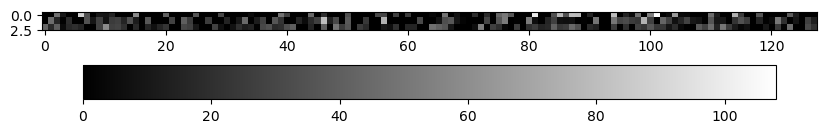


 [ 0  0 39  7  0 39 39 39 39 39]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)